# ***Install Required Libraries***

In [1]:
!pip install joblib wordcloud gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud
import joblib
import os

from google.colab import files

# ***Upload Dataset***

In [3]:
print("📁 Upload Fake.csv and True.csv")
uploaded = files.upload()  # Upload both files from your system

📁 Upload Fake.csv and True.csv


Saving Fake.csv to Fake.csv
Saving TRUE.csv to TRUE.csv


# ***Load and Merge Dataset***



In [7]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("TRUE.csv")

fake["label"] = 0
real["label"] = 1

df = pd.concat([fake, real])
df = df.sample(frac=1).reset_index(drop=True)
df = df[['text', 'label']].dropna()

print(f"✅ Dataset combined: {df.shape[0]} rows")


✅ Dataset combined: 26427 rows


# ***Visualize Class Distribution***

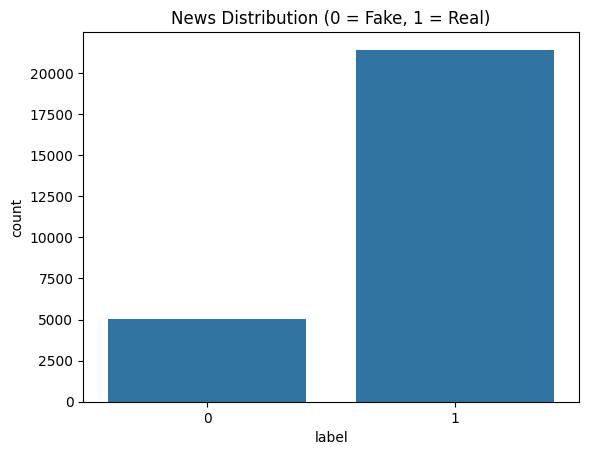

In [8]:
sns.countplot(x='label', data=df)
plt.title("News Distribution (0 = Fake, 1 = Real)")
plt.show()


# ***WordClouds (Optional Visualization)***

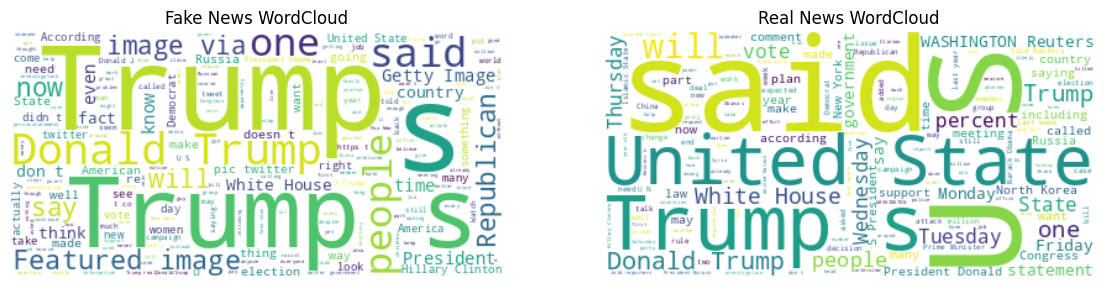

In [9]:
# Fake News
fake_words = " ".join(fake["text"].astype(str))
wordcloud_fake = WordCloud(background_color='white').generate(fake_words)

# Real News
real_words = " ".join(real["text"].astype(str))
wordcloud_real = WordCloud(background_color='white').generate(real_words)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News WordCloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News WordCloud")

plt.show()


# *Preprocessing and Splitting*

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)


# ***TF-IDF Vectorization***

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# ***Train Model (PassiveAggressive)***

In [12]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_vec, y_train)


PassiveAggressiveClassifier(max_iter=50)

# ***Evaluate Model***

🎯 Accuracy: 0.9981

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       960
           1       1.00      1.00      1.00      4326

    accuracy                           1.00      5286
   macro avg       1.00      1.00      1.00      5286
weighted avg       1.00      1.00      1.00      5286



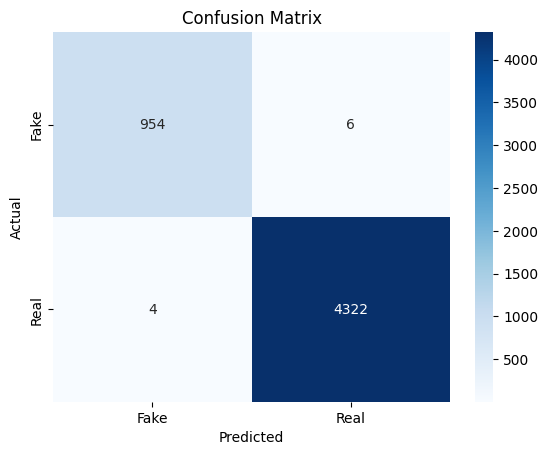

In [13]:
y_pred = model.predict(X_test_vec)

print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ***Save Model and Vectorizer***

In [14]:
os.makedirs("saved_model", exist_ok=True)
joblib.dump(model, "saved_model/fake_news_model.pkl")
joblib.dump(vectorizer, "saved_model/tfidf_vectorizer.pkl")

print("✅ Model and Vectorizer saved!")
files.download("saved_model/fake_news_model.pkl")
files.download("saved_model/tfidf_vectorizer.pkl")


✅ Model and Vectorizer saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Add Gradio UI for Demo (Optional)**

In [15]:
import gradio as gr

def classify_news(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    return "🟢 Real News" if prediction == 1 else "🔴 Fake News"

iface = gr.Interface(fn=classify_news,
                     inputs="text",
                     outputs="text",
                     title="📰 Fake News Detector",
                     description="Enter a news article text to classify it as Real or Fake.")
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a083a5743e842d34d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
